In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"D:\Data scince\ML data\car.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,NaN,NaN,NaN,NaN,NaN
1,15624510.0,Male,19.0,19000.0,0.0
2,NaN,NaN,NaN,NaN,NaN
3,15810944.0,Male,35.0,20000.0,0.0
4,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
1,15624510.0,Male,19.0,19000.0,0.0
3,15810944.0,Male,35.0,20000.0,0.0
5,15668575.0,Female,26.0,43000.0,0.0
7,15603246.0,Female,27.0,57000.0,0.0
9,15804002.0,Male,19.0,76000.0,0.0


In [7]:
df.drop('User ID',axis=1,inplace=True)

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
1,Male,19.0,19000.0,0.0
3,Male,35.0,20000.0,0.0
5,Female,26.0,43000.0,0.0
7,Female,27.0,57000.0,0.0
9,Male,19.0,76000.0,0.0


In [9]:
df.sort_values(by='EstimatedSalary',ascending=True)

,Gender,Age,EstimatedSalary,Purchased
185,Male,26.0,15000.0,0.0
87,Male,30.0,15000.0,0.0
311,Female,31.0,15000.0,0.0
301,Female,26.0,15000.0,0.0
65,Female,21.0,16000.0,0.0
...,...,...,...,...
337,Male,29.0,148000.0,1.0
207,Female,33.0,149000.0,1.0
481,Male,42.0,149000.0,1.0
423,Male,52.0,150000.0,1.0


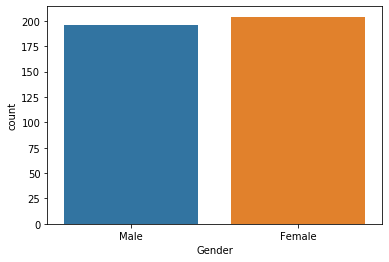

In [10]:
sns.countplot("Gender", data=df)

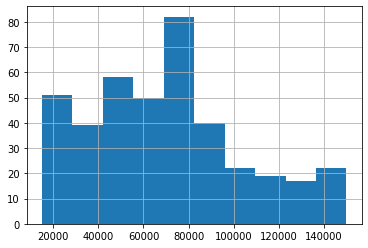

In [11]:
df['EstimatedSalary'].hist(bins=10)

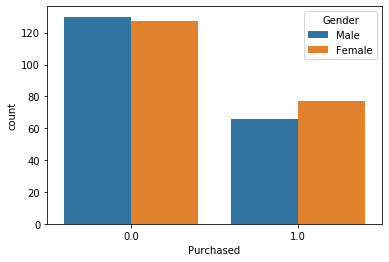

In [12]:
sns.countplot('Purchased', hue='Gender', data=df)

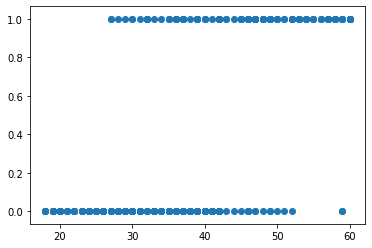

In [13]:
plt.scatter('Age','Purchased',data=df)

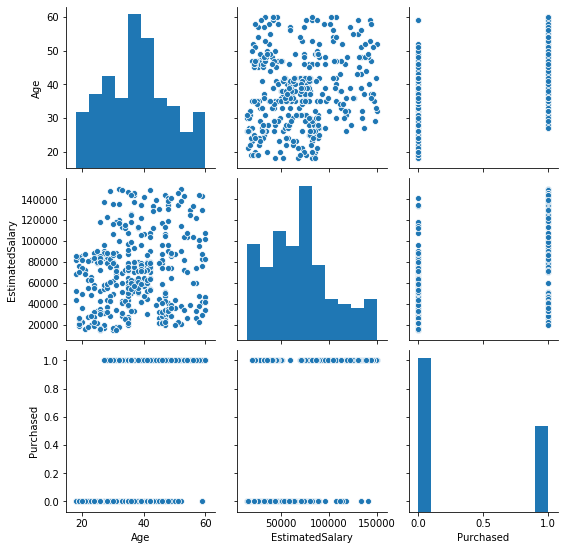

In [14]:
sns.pairplot(df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 799
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           400 non-null    object 
 1   Age              400 non-null    float64
 2   EstimatedSalary  400 non-null    float64
 3   Purchased        400 non-null    float64
dtypes: float64(3), object(1)
memory usage: 35.6+ KB


In [16]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [17]:
df.isnull().sum().values.sum()

0

In [18]:
df['Gender'] = pd.get_dummies(df['Gender'],drop_first=True)

In [19]:
X = df.drop('Purchased', axis=1)
y = df[['Purchased']]

In [20]:
X.head()

,Gender,Age,EstimatedSalary
1,1,19.0,19000.0
3,1,35.0,20000.0
5,0,26.0,43000.0
7,0,27.0,57000.0
9,1,19.0,76000.0


In [21]:
y.head()

,Purchased
1,0.0
3,0.0
5,0.0
7,0.0
9,0.0


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [53]:
# from random import shuffle

# X_train = shuffle(X_train)

In [54]:
# mn = MinMaxScaler()
# X_train = mn.fit_transform(X_train)
# X_test = mn.transform(X_test)

In [55]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
X_train.shape, y_train.shape

((320, 3), (320, 1))

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
lr = LogisticRegression()

In [59]:
model= lr.fit(X_train, y_train)


C:\Users\Ganesh Dixit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [60]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [62]:
cs = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)

In [63]:
print(cs,'\n',cm,'\n','\n',score)

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92        59
         1.0       0.77      0.81      0.79        21

    accuracy                           0.89        80
   macro avg       0.85      0.86      0.86        80
weighted avg       0.89      0.89      0.89        80
 
 [[54  5]
 [ 4 17]] 
 
 0.8875


In [64]:
# Using Decision Tree Classifier

In [65]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [66]:
dt = DecisionTreeClassifier(criterion='gini')

In [67]:
model1 = dt.fit(X_train,y_train)

In [68]:
y_pred1 = model1.predict(X_test)

In [69]:
cs = classification_report(y_test, y_pred1)
cm = confusion_matrix(y_test, y_pred1)
score = accuracy_score(y_test, y_pred1)

In [70]:
print(cs,'\n',cm,'\n','\n',score)

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        59
         1.0       0.75      0.71      0.73        21

    accuracy                           0.86        80
   macro avg       0.82      0.81      0.82        80
weighted avg       0.86      0.86      0.86        80
 
 [[54  5]
 [ 6 15]] 
 
 0.8625


In [71]:
# plt.figure(figsize=(15,30))
# a = plot_tree(dec, feature_names=df.columns,
#               filled=True, 
#               rounded=True,
#               fontsize=10)

In [72]:
#Using KNN

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=6)

In [75]:
model2 = knn.fit(X_train, y_train)

C:\Users\Ganesh Dixit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [76]:
y_pred2 = model2.predict(X_test)

In [77]:
cs = classification_report(y_test, y_pred2)
cm = confusion_matrix(y_test, y_pred2)
score = accuracy_score(y_test, y_pred2)

In [78]:
print(cs,'\n',cm,'\n','\n',score)

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        59
         1.0       0.82      0.86      0.84        21

    accuracy                           0.91        80
   macro avg       0.88      0.89      0.89        80
weighted avg       0.91      0.91      0.91        80
 
 [[55  4]
 [ 3 18]] 
 
 0.9125


In [79]:
new_score=[]

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    model2 = knn.fit(X_train, y_train)
    y_pred2 = model2.predict(X_test)
    loss = 1 - accuracy_score(y_test, y_pred2)
    new_score.append(loss)

C:\Users\Ganesh Dixit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Ganesh Dixit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Ganesh Dixit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Ganesh Dixit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Ganesh Dixit\Anaconda3\lib\site-packages\ip

C:\Users\Ganesh Dixit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Ganesh Dixit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Ganesh Dixit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Ganesh Dixit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """
C:\Users\Ganesh Dixit\Anaconda3\lib\site-packages\ip

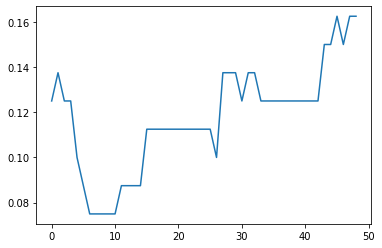

In [80]:
plt.plot(new_score)